In [1]:
from copy import deepcopy
from random import randint
import numpy as np
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

K-means

The key idea: 

__Step 1: random selection of centroids__

__Step 2: calculate distance to each point and assign each point to cluster__

__Step 3: calculate average of the assigned points and__

__Step 4: move centroids to the new position__

__Step 5: Steps 2-4 until cluster assignment is not changed__


In [2]:
def dist(a, b):
    return np.linalg.norm(a - b)

In [3]:
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = sqrt(squared_distances)
    return dist

Make some fake data

In [4]:
fake_centers = 4

x, y = make_blobs(n_samples=5000, centers=fake_centers, n_features=2, random_state=195)

x2 = deepcopy(x)
y2 = deepcopy(y)

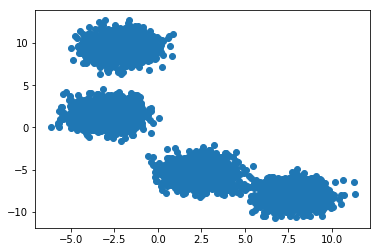

In [5]:
# plot regression dataset
%matplotlib inline
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.show()

Let's say that we want to cluster our data into 3 groups 

In [6]:
number_of_clusters = fake_centers

In [7]:
def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
                                           # 0.8 to stay in the range (it really doesn't matter as this
                                           #                           is random initialization)
    return c_position

In [8]:
n_features = 2
c_positions = generate_random_clusters(n_features, number_of_clusters) 
c_positions = np.array(c_positions).T

In [9]:
print(c_positions)

[[ 0 -4]
 [ 1 -4]
 [ 4  2]
 [ 0 -1]]


In [10]:
print(x)

[[-2.22184336  9.54322808]
 [-2.93035582  2.09656522]
 [-2.26864184  1.08611059]
 ...
 [-1.3407027   9.36630316]
 [-2.13478719  2.12848153]
 [-1.65362094  8.79790151]]


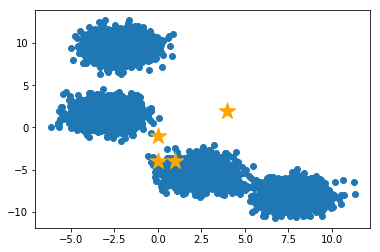

In [11]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(c_positions[:, 0], c_positions[:, 1], marker='*', s=300, c='orange')
pyplot.show()

Error function is defined as distance between new centroids and old centroids

In [12]:
def error(c, c_old):
    return dist(c, c_old)

So now we are ready to start K-means we need to loop until error is zero then we can break

In [13]:
def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            c_positions[j] = np.mean(points, axis=0)        
        
        error = dist(c_positions, old_clusters)
        
    return c_positions, clusters

In [14]:
new_clusters, p = kmeans(x, c_positions, number_of_clusters)

In [15]:
print(new_clusters)

[[ 2 -5]
 [ 7 -8]
 [-2  9]
 [-2  1]]


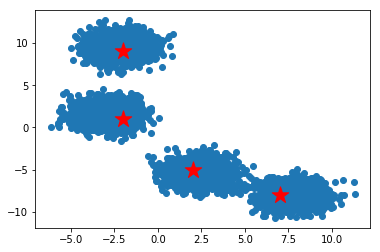

In [16]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
pyplot.show()

In [17]:
def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

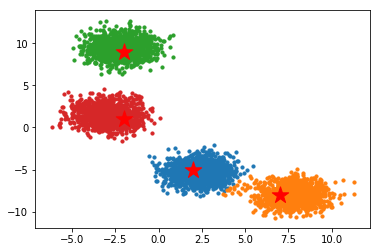

In [18]:
plot_in_col(x, number_of_clusters, p, new_clusters)